1. Mô phỏng quy hoạch tần số

•Viết chương trình Python để hiển thị sơ đồ cell với các giá trị K=3, 7, 12.

•Mô phỏng cách xác định vị trí của các cell đồng kênh bằng cách sử dụng công thức 

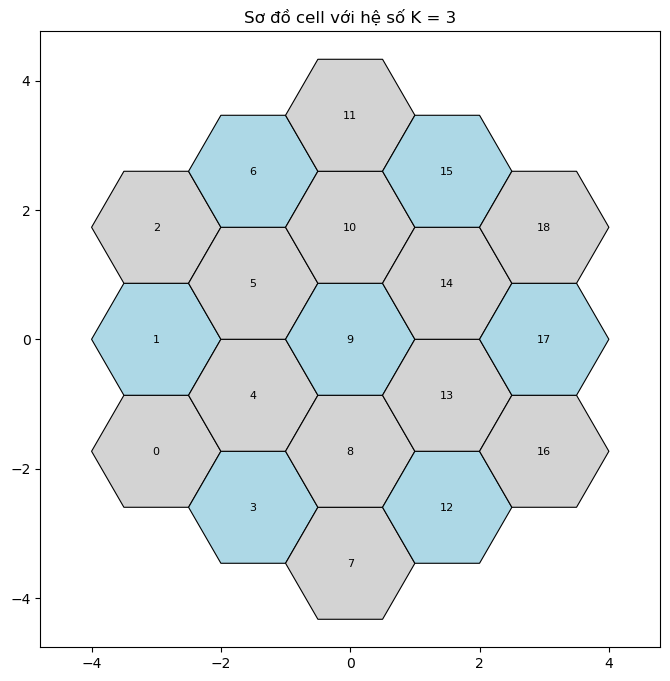

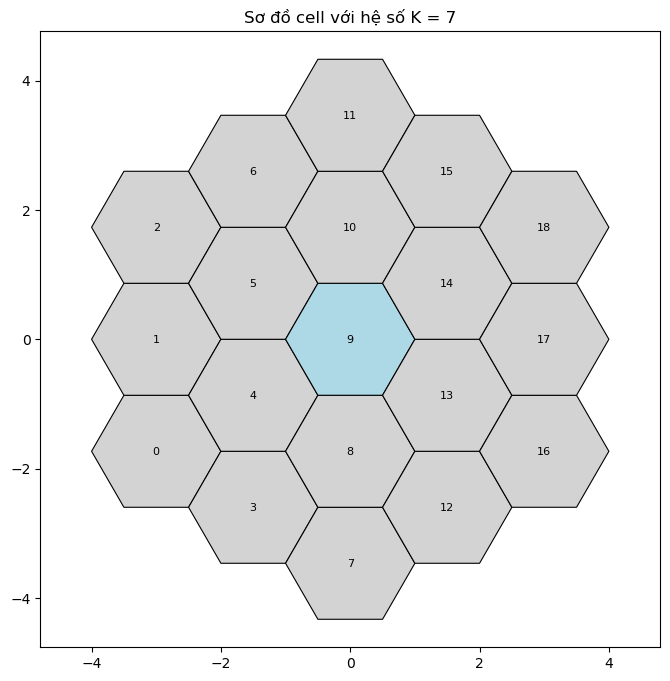

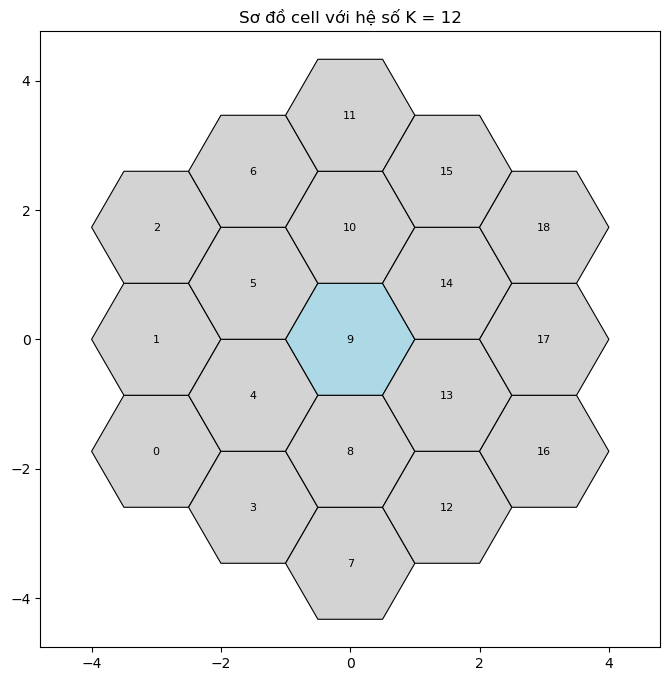

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def draw_hexagon(x, y, size=1, color='lightgray', label=None):
    angle = np.linspace(0, 2 * np.pi, 7)
    x_hex = x + size * np.cos(angle)
    y_hex = y + size * np.sin(angle)
    plt.fill(x_hex, y_hex, color=color, edgecolor='black', linewidth=0.8)
    if label:
        plt.text(x, y, label, ha='center', va='center', fontsize=8)

def generate_cells(K, R=1):
    cell_coords = []
    n_rings = 2  # Số vòng hex (tùy chỉnh theo nhu cầu)
    for q in range(-n_rings, n_rings + 1):
        for r in range(-n_rings, n_rings + 1):
            s = -q - r
            if abs(s) <= n_rings:
                x = R * 3/2 * q
                y = R * np.sqrt(3) * (r + q/2)
                cell_coords.append((x, y))
    return cell_coords

def plot_frequency_reuse(K):
    plt.figure(figsize=(8, 8))
    coords = generate_cells(K)
    D = np.sqrt(3 * K)
    for idx, (x, y) in enumerate(coords):
        # Đồng kênh nếu modulo khoảng cách chia hết cho D (giản lược)
        is_cochannel = round((x**2 + y**2)**0.5, 1) % round(D, 1) < 0.1
        draw_hexagon(x, y, color='lightblue' if is_cochannel else 'lightgray', label=str(idx))
    plt.axis('equal')
    plt.title(f'Sơ đồ cell với hệ số K = {K}')
    plt.show()

# Gọi hàm mô phỏng cho K = 3, 7, 12
for K in [3, 7, 12]:
    plot_frequency_reuse(K)


2 Tính toán nhiễu đồng kênh bằng Python

•Viết một chương trình để tính toán mức nhiễu đồng kênh dựa trên khoảng cách tái sử dụng D. 

•So sánh nhiễu giữa các giá trị K=7, K=12.

In [4]:
def calculate_CI(K, R=1, i=6, gamma=4):
    D = R * np.sqrt(3 * K)
    CI = 1 / i * (D / R) ** (-gamma)
    return CI

K_values = [7, 12]
for K in K_values:
    ci = calculate_CI(K)
    print(f"K = {K}, C/I = {ci:.6f} → {10*np.log10(1/ci):.2f} dB")


K = 7, C/I = 0.000378 → 34.23 dB
K = 12, C/I = 0.000129 → 38.91 dB
